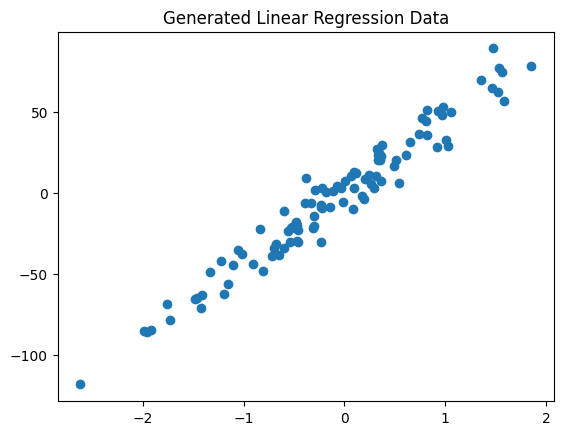

In [19]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

plt.scatter(X, y)
plt.title("Generated Linear Regression Data")
plt.show()


In [101]:
class Linear_Regression:
    def __init__(self,lr = 0.001, epochs = 10000):
        self.lr = lr
        self.weights = None
        self.bias = None
        self.epochs = epochs
        self.errs = []
    
    def train(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.epochs):
            h = self.forward(X)
            self.errs.append(self.mse(h,y))
            err = y - h
            m = len(y)

            dw = -(2 / m) * np.dot(X.T, err)
            db = -(2 / m) * np.sum(err)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def forward(self, X):
        return np.dot(X, self.weights) + self.bias
        

    def mse(self, h, y):
        return np.mean((y - h) ** 2)

    def plot_err(self):
        plt.scatter(self.errs, [i for i in range(len(self.errs))])
        plt.title("Error over epoch")
        plt.show()

    def plot_line(self, X):
        x_line = np.linspace(X.min(), X.max(), 100) 
        y_line = self.weights[0] * x_line + self.bias
        
        plt.scatter(X, y, color="blue", label="Data Points")
        plt.plot(x_line, y_line, color="red", label="Regression Line")
        plt.title("Linear Regression Fit")
        plt.legend()
        plt.show()        


        

In [102]:
model = Linear_Regression()
model.train(X,y)

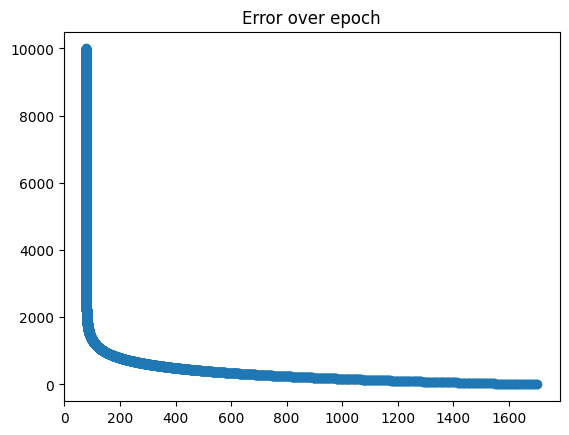

In [103]:
model.plot_err()

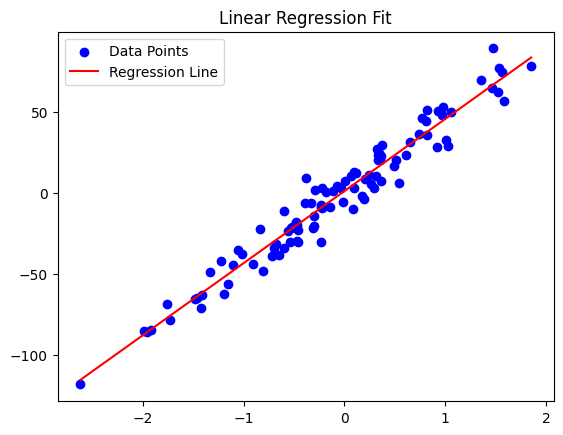

In [104]:
model.plot_line(X)